## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [218]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [219]:
## Import the source for model building

iris = pd.read_csv(r'C:\Users\sriram.kannan\Desktop\PGP-AIML\Residency3\Lab\Iris.csv', sep=',');
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [220]:
# Check dimension of data

In [221]:
# Prints the no of rows and columns in the gven dataset
print (iris.shape)

(152, 6)


In [222]:
#Check data Type

In [223]:
# prints the datatype of each field in a dataset
print (iris.dtypes)  

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [224]:
# Since the field "Species" is categorical variable, we need to convert the encode the same into numerical values for computation

# Get all non-numeric columns

## Non-numeric attributes



att_nonnumeric=iris.select_dtypes(exclude=['int64']);

# Converting all Categorical variables into numerical variables
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder

a=list(att_nonnumeric);
LE=LabelEncoder();
iris[a]=iris[a].apply(lambda col : LE.fit_transform(col));

# prints the values with values converted for categorical
iris

# Species column has been encoded with values 0,1,2 respectively

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,8,14,4,1,0
1,2,6,9,4,1,0
2,3,4,11,3,1,0
3,4,3,10,5,1,0
4,5,7,15,4,1,0
5,6,11,18,7,3,0
6,7,3,13,4,2,0
7,8,7,13,5,1,0
8,9,1,8,4,1,0
9,10,6,10,5,0,0


In [225]:
# Check for NaN/Null values
# prints the lines that has null values in one or more columns

print(iris[iris.isnull().any(axis=1)])

# We can observe that there're a cople of records with Nan values in the dataset
# We will replace those values with the corresponding column's test statstic(median) as below

med_sl=iris['SepalLengthCm'].median();
iris['SepalLengthCm']=iris['SepalLengthCm'].fillna(med_sl);

med_sw=iris['SepalWidthCm'].median()
iris['SepalWidthCm']=iris['SepalWidthCm'].fillna(med_sw);

med_pl=iris['PetalLengthCm'].median()
iris['PetalLengthCm']=iris['PetalLengthCm'].fillna(med_pl);

med_pw=iris['PetalWidthCm'].median()
iris['PetalWidthCm']=iris['PetalWidthCm'].fillna(med_pw);

iris

# Missing values have been replaced with the median value for each field

# Approach 2
# Can be done through Imputer function in the preprocessing library as well



Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,8,14,4,1,0
1,2,6,9,4,1,0
2,3,4,11,3,1,0
3,4,3,10,5,1,0
4,5,7,15,4,1,0
5,6,11,18,7,3,0
6,7,3,13,4,2,0
7,8,7,13,5,1,0
8,9,1,8,4,1,0
9,10,6,10,5,0,0


### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [226]:
# Create X and Y variables for buiding the model
# Features are my independent set of variables, minus the dependent variable
# Target is my variable called as Species

X= iris.drop(columns=['Species'])
Y= iris['Species']


In [227]:
#Check the dataset
print(Y);
print(X);

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
150    2
151    2
Name: Species, Length: 152, dtype: int32
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1              8            14              4             1
1      2              6             9              4             1
2      3              4            11              3             1
3      4              3            10              5             1
4      5              7            15              4             1
5      6

### Find the distribution of target variable (Class) (1 Marks)

In [228]:

# Describes the distribution of the target variable called as Class
iris['Species'].describe(include='all').transpose()



count    152.000000
mean       1.013158
std        0.821780
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Species, dtype: float64

### Plot the distribution of target variable using histogram

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 52.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

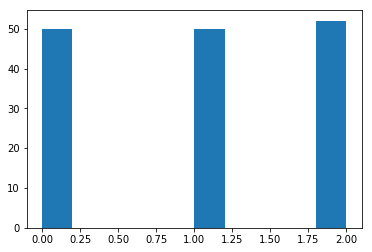

In [229]:
# Disribution using Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


plt.hist(iris['Species'])


## Matplotlib

#import matplotlib.pyplot as plt
#plt.hist(x, normed=True, bins=30)
#plt.ylabel('Probability');


### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001639D6B3E80>,
      dtype=object)

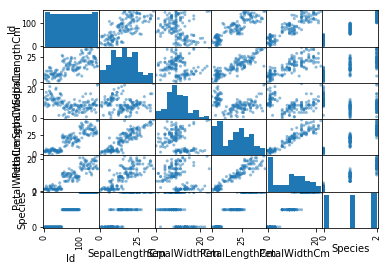

In [230]:
# Scatter Matrix and Pair plot

## Using Scatter matrix
pd.plotting.scatter_matrix(iris, alpha=0.5)

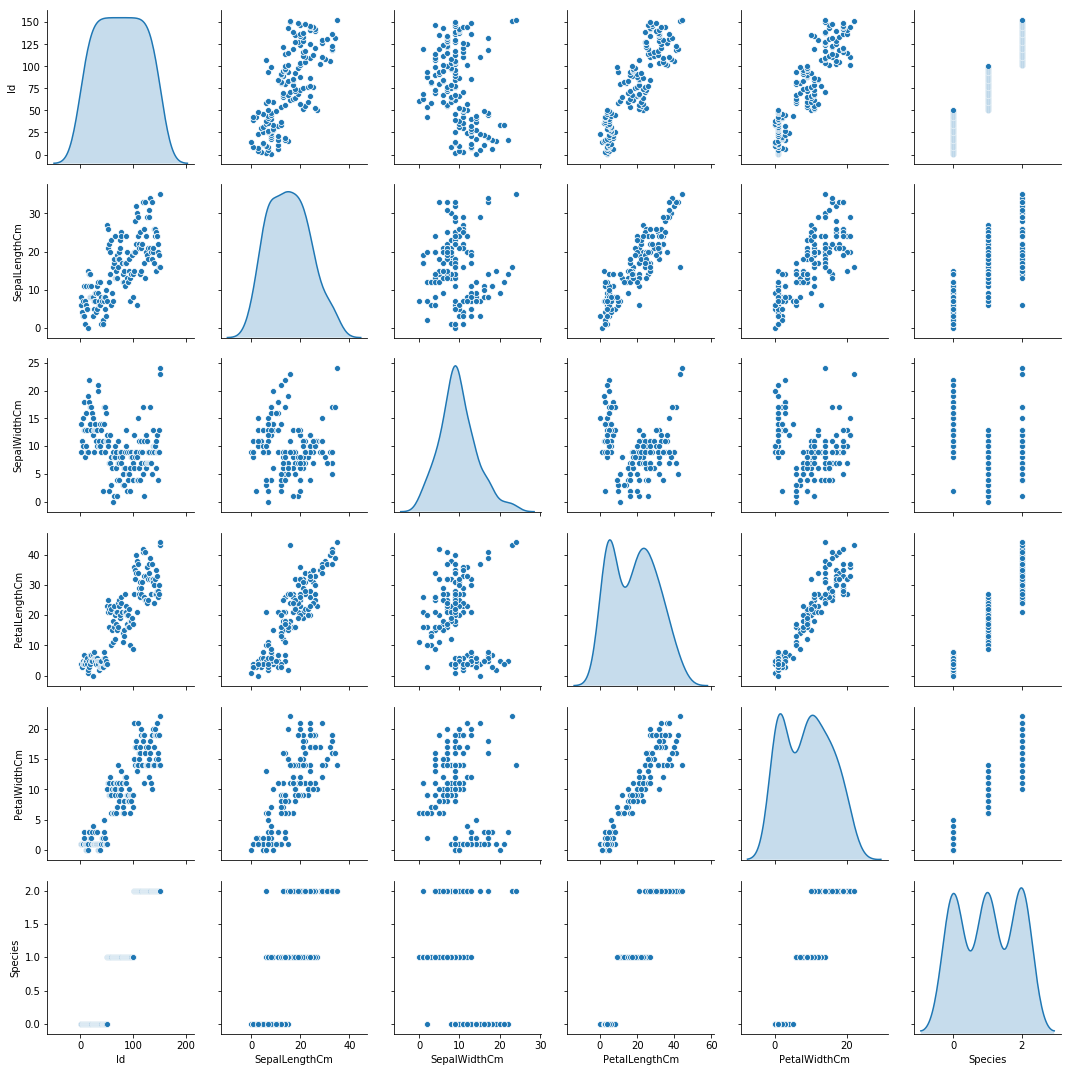

In [231]:
# Using pair plot


import seaborn as sns
iris = iris.iloc[:,0:7];
sns.pairplot(iris, diag_kind='kde') 

In [232]:
# Inference from the plots

# Petal Length and Petal width seems to be of more or less of the same value for each value of the Species
# Sepal length and Sepal width differ for each species value.
# For example, there's an ID with sepal width 10 and belonging to species Setosa, and there would be an ID with width 20 and belonging to Setosa as well



### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [233]:
# Summary statistics for each data in a set

iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.5,114.25,152.0
SepalLengthCm,152.0,15.519737,8.275849,0.0,8.00,15.0,21.00,35.0
SepalWidthCm,152.0,9.723684,4.560407,0.0,7.00,9.0,12.25,24.0
PetalLengthCm,152.0,18.532895,11.927439,0.0,6.00,20.0,27.00,44.0
PetalWidthCm,152.0,9.105263,6.462483,0.0,2.00,9.0,14.00,22.0
Species,152.0,1.013158,0.821780,0.0,0.00,1.0,2.00,2.0


In [234]:
# Inference from the statistics

# 1) Sepal Length
# Out of 152, the mean of sepal length is 15.51 with standard deviation of 8.2x. The 50th percentile of the length is 15cm with the maximum being 35cm

# 2) Petal Width
# Out of 152, the mean of Petal length is 9.xx with standard deviation of 6.46. The 50th percentile of the width is 9cm with the maximum being 22cm


In [235]:
#Drop Id variable from data

X=X.drop(columns=['Id'])

iris=iris.drop(columns=['Id']);

### Correlation among all variables and give your insights (1 Marks)

In [236]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

# Let's find the correlation between the feature and target variable

iris.corr()

# Inference
# From the correlation chart
# we infer that 
# Sepal Length and Petal Length, Sepal Length and Petal Width, Species and  are highly correlated
# Sepal Length and Petal length, Species and Petal Width are highly correlated

# In order not to inflate the figures, we remove either of the correlated figures to get a better model




,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.055830,0.889417,0.803838,0.782870
SepalWidthCm,-0.055830,1.000000,-0.192929,-0.216749,-0.341843
PetalLengthCm,0.889417,-0.192929,1.000000,0.940740,0.935728
PetalWidthCm,0.803838,-0.216749,0.940740,1.000000,0.946214
Species,0.782870,-0.341843,0.935728,0.946214,1.000000


### Split data in Training and Validation in 80:20 (1 Marks)

In [237]:
### SPLITTING INTO TRAINING AND TEST SETS

# Divide the dataset into training and test
# Ratio is 8:2


#X= X.values.reshape(-1, 1);
#Y= Y.values.reshape(-1, 1);

from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


## Size of Training & Test sets of X frame
print (X_train.shape, X_test.shape);

## Size of Training & Test sets of Y frame
print (Y_train.shape, Y_test.shape);

(121, 4) (31, 4)
(121,) (31,)


### Do Feature Scaling ( 1 Marks)

In [238]:
# Use StandardScaler or similar methods

# import the libraries for standardisation

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# bring all the columns of Iris to a list and standardize them


a=list(iris)
ct = ColumnTransformer([("scaling", StandardScaler(), a)]);


                        
                        

### Train and Fit NaiveBayes Model(2 Marks)

In [239]:
#Fit the model

In [240]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

GNB = clf.fit(X_train, Y_train)

In [241]:
#Predict

Y_pred = GNB.predict(X_test)
Y_pred



array([1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 1, 2, 0])

In [242]:
# Get the probability
## Get the probability
iris['prob'] = pd.DataFrame(GNB.predict_proba(X_train))[1]
iris['prob']


0      6.559640e-09
1      2.102887e-02
2      5.009319e-03
3      1.556407e-01
4      3.917928e-06
5      9.925531e-01
6      3.223297e-02
7      6.885350e-01
8      1.198864e-08
9      9.546561e-01
10     8.045004e-12
11     9.917704e-01
12     2.871264e-08
13     8.929774e-01
14     3.355085e-01
15     7.682564e-06
16     9.980485e-01
17     2.977847e-06
18     5.074006e-09
19     1.340109e-09
20     1.798606e-07
21     9.911073e-01
22     1.340818e-08
23     3.128985e-08
24     1.289743e-10
25     3.494967e-16
26     1.005617e-03
27     6.554350e-09
28     1.267869e-03
29     9.931031e-01
           ...     
122             NaN
123             NaN
124             NaN
125             NaN
126             NaN
127             NaN
128             NaN
129             NaN
130             NaN
131             NaN
132             NaN
133             NaN
134             NaN
135             NaN
136             NaN
137             NaN
138             NaN
139             NaN
140             NaN


### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [243]:
# show Confusion Matrix

In [244]:
# Confusion Matrix of Model1 

import sklearn
Y_pred = GNB.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test, Y_pred))



[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [245]:
# show accuracy

In [246]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy score is ", accuracy_score(Y_test, Y_pred))


Accuracy score is  1.0


In [247]:
#Show precision and Recall metrics

In [248]:
print("Precision score is ", precision_score(Y_test, Y_pred, average='macro'));
print("Recall score is ", recall_score(Y_test, Y_pred, average='macro'));

Precision score is  1.0
Recall score is  1.0


## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [249]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [257]:
# Iris is already imported for the Naive Bayes
iris.drop(columns=['prob'], inplace=True)

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [258]:
# Missing values are imported in the Naive Bayes set

# Missing values for the fields are replaced with the corresponding median score

print(iris[iris.isnull().any(axis=1)])

# No records with missing values

Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [ ]:
# Field "Species" which is Categorical is converted o Numerical values using encoding technique in the Bayes set

In [260]:
# Correlation between the Target variable "Species" and the independent variables

a = list(X)

for i in a:
    print("Correlation of {} with Species is {}".format(i, Y.corr(X[i])))
    
# From the correlation values, we observe the following
# Correlation between Species and other variables are in the greater range (above 0.1 considering modulus)
# therefore, none of the variables need to be dropped


Correlation of SepalLengthCm with Species is 0.7828699932268117
Correlation of SepalWidthCm with Species is -0.34184296806531816
Correlation of PetalLengthCm with Species is 0.9357275032920253
Correlation of PetalWidthCm with Species is 0.9462140342979258


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [267]:
# Variance for each independent variables

for i in a:
    print("Variance of {} is {}".format(i,iris[i].var()));
    
# We observe that the variables have a variance of more than 0.1
# No need to drop any variables as each has a significant value

Variance of SepalLengthCm is 68.48967410247472
Variance of SepalWidthCm is 20.797316138027192
Variance of PetalLengthCm is 142.26381143255477
Variance of PetalWidthCm is 41.763680724991325


## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163A253AC50>,
      dtype=object)

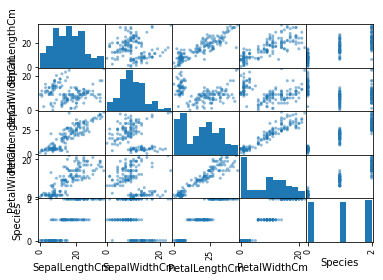

In [268]:
# Scatter Matrix and Pair plot

## Using Scatter matrix
pd.plotting.scatter_matrix(iris, alpha=0.5)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [269]:
### SPLITTING INTO TRAINING AND TEST SETS

# Divide the dataset into training and test
# Ratio is 8:2


#X= X.values.reshape(-1, 1);
#Y= Y.values.reshape(-1, 1);

from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


## Size of Training & Test sets of X frame
print (X_train.shape, X_test.shape);

## Size of Training & Test sets of Y frame
print (Y_train.shape, Y_test.shape);

(121, 4) (31, 4)
(121,) (31,)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [277]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# knn model

# For K values 3,5,9

k_val=[3,5,9];


for k in k_val:
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', 
                           metric = 'euclidean');
    knn.fit(X_train, Y_train);
    Y_pred=knn.predict(X_test);
    print ("Accuracy for K value {} is {}".format(k,accuracy_score(Y_test, Y_pred)));



Accuracy for K value 3 is 1.0
Accuracy for K value 5 is 1.0
Accuracy for K value 9 is 1.0


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [293]:
k_val=[1,3,5,7,9,11,13,15,17,19];
MSE={};

for k in k_val:
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', 
                           metric = 'euclidean');
    knn.fit(X_train, Y_train);
    Y_pred=knn.predict(X_test);
    ac_sc=accuracy_score(Y_test, Y_pred);
    ms_error= 1- ac_sc;
    print ("Misclassification Error for K value {} is {}".format(k,ms_error));
    MSE[k]=ms_error;
    
# Splitting K and MSE from the MSE dictionary calculated above

MSE1 = list(MSE.values());
K=list(MSE.keys());




Misclassification Error for K value 1 is 0.032258064516129004
Misclassification Error for K value 3 is 0.0
Misclassification Error for K value 5 is 0.0
Misclassification Error for K value 7 is 0.032258064516129004
Misclassification Error for K value 9 is 0.0
Misclassification Error for K value 11 is 0.0
Misclassification Error for K value 13 is 0.0
Misclassification Error for K value 15 is 0.0
Misclassification Error for K value 17 is 0.0
Misclassification Error for K value 19 is 0.032258064516129004


In [ ]:
# From the calculation of MSE, we observe the following
# K values - 3,5,,11,13,15,17 have the lowest MSE value

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

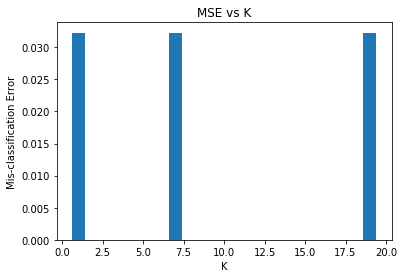

In [306]:
# K and Misclassifcation are split in the previous question as MSE and K

import matplotlib.pyplot as plt


plt.bar(k_val,MSE1,align='center')
plt.ylabel('Mis-classification Error')
plt.xlabel('K');
plt.title('MSE vs K')
plt.show()